In [1]:
library(Seurat)
library(ggplot2)

Attaching SeuratObject



In [2]:
## load in samples
seurat_B006_3 <- Load10X_Spatial(
  data.dir = "/home/ssobti/projects/farnaz_spatial/data/mouse_data_late_2023/unpacked_data/B006_3/outs",
  filename = "filtered_feature_bc_matrix.h5",
  assay = "Spatial",
  slice = "B006_3",
  filter.matrix = TRUE,
  to.upper = FALSE,
  image = NULL,
)

seurat_A021_3 <- Load10X_Spatial(
  "/home/ssobti/projects/farnaz_spatial/data/mouse_data_late_2023/unpacked_data/A021_3/outs",
  filename = "filtered_feature_bc_matrix.h5",
  assay = "Spatial",
  slice = "A006_3",
  filter.matrix = TRUE,
  to.upper = FALSE,
  image = NULL,
)

seurat_A006_3 <- Load10X_Spatial(
  "/home/ssobti/projects/farnaz_spatial/data/mouse_data_late_2023/unpacked_data/A006_3/outs",
  filename = "filtered_feature_bc_matrix.h5",
  assay = "Spatial",
  slice = "A006_3",
  filter.matrix = TRUE,
  to.upper = FALSE,
  image = NULL,
)

seurat_A041_6 <- Load10X_Spatial(
  "/home/ssobti/projects/farnaz_spatial/data/mouse_data_late_2023/unpacked_data/A041_6/outs",
  filename = "filtered_feature_bc_matrix.h5",
  assay = "Spatial",
  slice = "A041_6",
  filter.matrix = TRUE,
  to.upper = FALSE,
  image = NULL,
)

seurat_B021_6 <- Load10X_Spatial(
  "/home/ssobti/projects/farnaz_spatial/data/mouse_data_late_2023/unpacked_data/B021_6/outs",
  filename = "filtered_feature_bc_matrix.h5",
  assay = "Spatial",
  slice = "B021_6",
  filter.matrix = TRUE,
  to.upper = FALSE,
  image = NULL,
)

seurat_B041_6 <- Load10X_Spatial(
  "/home/ssobti/projects/farnaz_spatial/data/mouse_data_late_2023/unpacked_data/B041_6/outs",
  filename = "filtered_feature_bc_matrix.h5",
  assay = "Spatial",
  slice = "B041_6",
  filter.matrix = TRUE,
  to.upper = FALSE,
  image = NULL,
)


Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from b006_3_ to b0063_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from a006_3_ to a0063_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from a006_3_ to a0063_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from a041_6_ to a0416_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from b021_6_ to b0216_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from b041_6_ to b0416_”


In [3]:
## add probabilities meta data
probabilities = read.csv('/home/ssobti/projects/farnaz_spatial/output_data/mouse_late_2023/cell2location/multi_ref_annot/cell2location_map/N2_alpha20_cleaned_slides_v2/q05_cell_abundance_w_sf.csv')
probabilities$sample = stringr::str_sub(probabilities$spot_id, 1, 6)
probabilities$spot_id = stringr::str_sub(probabilities$spot_id, start = 8)


## take out spots not present in probability data add probability data into meta data
B006_3_probs = probabilities[probabilities$sample == 'B006_3',]$spot_id
seurat_B006_3 = seurat_B006_3[,rownames(seurat_B006_3@meta.data) %in% B006_3_probs]
seurat_B006_3@meta.data = cbind(seurat_B006_3@meta.data, probabilities[probabilities$sample == 'B006_3',][match(rownames(seurat_B006_3@meta.data), B006_3_probs),][,colnames(probabilities) != 'spot_id'])
colnames(seurat_B006_3@meta.data) = ifelse(test = startsWith(colnames(seurat_B006_3@meta.data), 'q05cell_abundance_w_sf_'), yes = stringr::str_sub(colnames(seurat_B006_3@meta.data), start = 24), no = colnames(seurat_B006_3@meta.data))

A021_3_probs = probabilities[probabilities$sample == 'A021_3',]$spot_id
seurat_A021_3 = seurat_A021_3[,rownames(seurat_A021_3@meta.data) %in% A021_3_probs]
seurat_A021_3@meta.data = cbind(seurat_A021_3@meta.data, probabilities[probabilities$sample == 'A021_3',][match(rownames(seurat_A021_3@meta.data), A021_3_probs),][,colnames(probabilities) != 'spot_id'])
colnames(seurat_A021_3@meta.data) = ifelse(test = startsWith(colnames(seurat_A021_3@meta.data), 'q05cell_abundance_w_sf_'), yes = stringr::str_sub(colnames(seurat_A021_3@meta.data), start = 24), no = colnames(seurat_A021_3@meta.data))

A006_3_probs = probabilities[probabilities$sample == 'A006_3',]$spot_id
seurat_A006_3 = seurat_A006_3[,rownames(seurat_A006_3@meta.data) %in% A006_3_probs]
seurat_A006_3@meta.data = cbind(seurat_A006_3@meta.data, probabilities[probabilities$sample == 'A006_3',][match(rownames(seurat_A006_3@meta.data), A006_3_probs),][,colnames(probabilities) != 'spot_id'])
colnames(seurat_A006_3@meta.data) = ifelse(test = startsWith(colnames(seurat_A006_3@meta.data), 'q05cell_abundance_w_sf_'), yes = stringr::str_sub(colnames(seurat_A006_3@meta.data), start = 24), no = colnames(seurat_A006_3@meta.data))

A041_6_probs = probabilities[probabilities$sample == 'A041_6',]$spot_id
seurat_A041_6 = seurat_A041_6[,rownames(seurat_A041_6@meta.data) %in% A041_6_probs]
seurat_A041_6@meta.data = cbind(seurat_A041_6@meta.data, probabilities[probabilities$sample == 'A041_6',][match(rownames(seurat_A041_6@meta.data), A041_6_probs),][,colnames(probabilities) != 'spot_id'])
colnames(seurat_A041_6@meta.data) = ifelse(test = startsWith(colnames(seurat_A041_6@meta.data), 'q05cell_abundance_w_sf_'), yes = stringr::str_sub(colnames(seurat_A041_6@meta.data), start = 24), no = colnames(seurat_A041_6@meta.data))

B021_6_probs = probabilities[probabilities$sample == 'B021_6',]$spot_id
seurat_B021_6 = seurat_B021_6[,rownames(seurat_B021_6@meta.data) %in% B021_6_probs]
seurat_B021_6@meta.data = cbind(seurat_B021_6@meta.data, probabilities[probabilities$sample == 'B021_6',][match(rownames(seurat_B021_6@meta.data), B021_6_probs),][,colnames(probabilities) != 'spot_id'])
colnames(seurat_B021_6@meta.data) = ifelse(test = startsWith(colnames(seurat_B021_6@meta.data), 'q05cell_abundance_w_sf_'), yes = stringr::str_sub(colnames(seurat_B021_6@meta.data), start = 24), no = colnames(seurat_B021_6@meta.data))

B041_6_probs = probabilities[probabilities$sample == 'B041_6',]$spot_id
seurat_B041_6 = seurat_B041_6[,rownames(seurat_B041_6@meta.data) %in% B041_6_probs]
seurat_B041_6@meta.data = cbind(seurat_B041_6@meta.data, probabilities[probabilities$sample == 'B041_6',][match(rownames(seurat_B041_6@meta.data), B041_6_probs),][,colnames(probabilities) != 'spot_id'])
colnames(seurat_B041_6@meta.data) = ifelse(test = startsWith(colnames(seurat_B041_6@meta.data), 'q05cell_abundance_w_sf_'), yes = stringr::str_sub(colnames(seurat_B041_6@meta.data), start = 24), no = colnames(seurat_B041_6@meta.data))

In [24]:
## save objects
saveRDS(seurat_B006_3, '/home/ssobti/projects/farnaz_spatial/output_data/mouse_late_2023/seurat_objects/seurat_B006_3.rds')
saveRDS(seurat_A021_3, '/home/ssobti/projects/farnaz_spatial/output_data/mouse_late_2023/seurat_objects/seurat_A021_3.rds')
saveRDS(seurat_A006_3, '/home/ssobti/projects/farnaz_spatial/output_data/mouse_late_2023/seurat_objects/seurat_A006_3.rds')
saveRDS(seurat_A041_6, '/home/ssobti/projects/farnaz_spatial/output_data/mouse_late_2023/seurat_objects/seurat_A041_6.rds')
saveRDS(seurat_B021_6, '/home/ssobti/projects/farnaz_spatial/output_data/mouse_late_2023/seurat_objects/seurat_B021_6.rds')
saveRDS(seurat_B041_6, '/home/ssobti/projects/farnaz_spatial/output_data/mouse_late_2023/seurat_objects/seurat_B041_6.rds')

In [5]:
## first block of code to run -- edit paths to seurat objects
library(Seurat)
library(ggplot2)

seurat_B006_3 = readRDS('path/to/seurat_B006_3.rds')
seurat_A021_3 = readRDS('path/to/seurat_A021_3.rds')
seurat_A006_3 = readRDS('path/to/seurat_A006_3.rds')
seurat_A041_6 = readRDS('path/to/seurat_A041_6.rds')
seurat_B021_6 = readRDS('path/to/seurat_B021_6.rds')
seurat_B041_6 = readRDS('path/to/seurat_B041_6.rds')

## next block of code to run
## this is where you can lower/increase threshold to increase/decrease number of spots assigned to cell types
thresholds = c(
    0.120299, 0.048750, 0.564294, 0.290414, ## Adipocyte_progenitors, Adipocytes, B_cells, Brown_adipocytes
    0.228138, 0.074771, 0.187500, 0.109719, ## Endothelial_cells, Eosinophils, Epithelial_cells, Lymphatic_endothelial_cells
    0.060000, 0.333331, 0.077976, 0.176437, ## Macrophages, Mast_cells, Mesothelium, NK_cells
    0.149922, 0.200418, 0.163568, 0.229765, ## Neutrophils, Pericytes, Schwan_cells, T_cells
    0.300445, 0.157593) ## Tregs, Vascular_smooth_muscle

binaries = t(apply(seurat_B006_3@meta.data[,4:21], 1, function(x) x > thresholds))
colnames(binaries) = paste(colnames(seurat_B006_3@meta.data[,4:21]), 'binary', sep = '_')
seurat_B006_3@meta.data[colnames(binaries)] = binaries

binaries = t(apply(seurat_A021_3@meta.data[,4:21], 1, function(x) x > thresholds))
colnames(binaries) = paste(colnames(seurat_A021_3@meta.data[,4:21]), 'binary', sep = '_')
seurat_A021_3@meta.data[colnames(binaries)] = binaries

binaries = t(apply(seurat_A006_3@meta.data[,4:21], 1, function(x) x > thresholds))
colnames(binaries) = paste(colnames(seurat_A006_3@meta.data[,4:21]), 'binary', sep = '_')
seurat_A006_3@meta.data[colnames(binaries)] = binaries

binaries = t(apply(seurat_A041_6@meta.data[,4:21], 1, function(x) x > thresholds))
colnames(binaries) = paste(colnames(seurat_A041_6@meta.data[,4:21]), 'binary', sep = '_')
seurat_A041_6@meta.data[colnames(binaries)] = binaries

binaries = t(apply(seurat_B021_6@meta.data[,4:21], 1, function(x) x > thresholds))
colnames(binaries) = paste(colnames(seurat_B021_6@meta.data[,4:21]), 'binary', sep = '_')
seurat_B021_6@meta.data[colnames(binaries)] = binaries

binaries = t(apply(seurat_B041_6@meta.data[,4:21], 1, function(x) x > thresholds))
colnames(binaries) = paste(colnames(seurat_B041_6@meta.data[,4:21]), 'binary', sep = '_')
seurat_B041_6@meta.data[colnames(binaries)] = binaries

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale

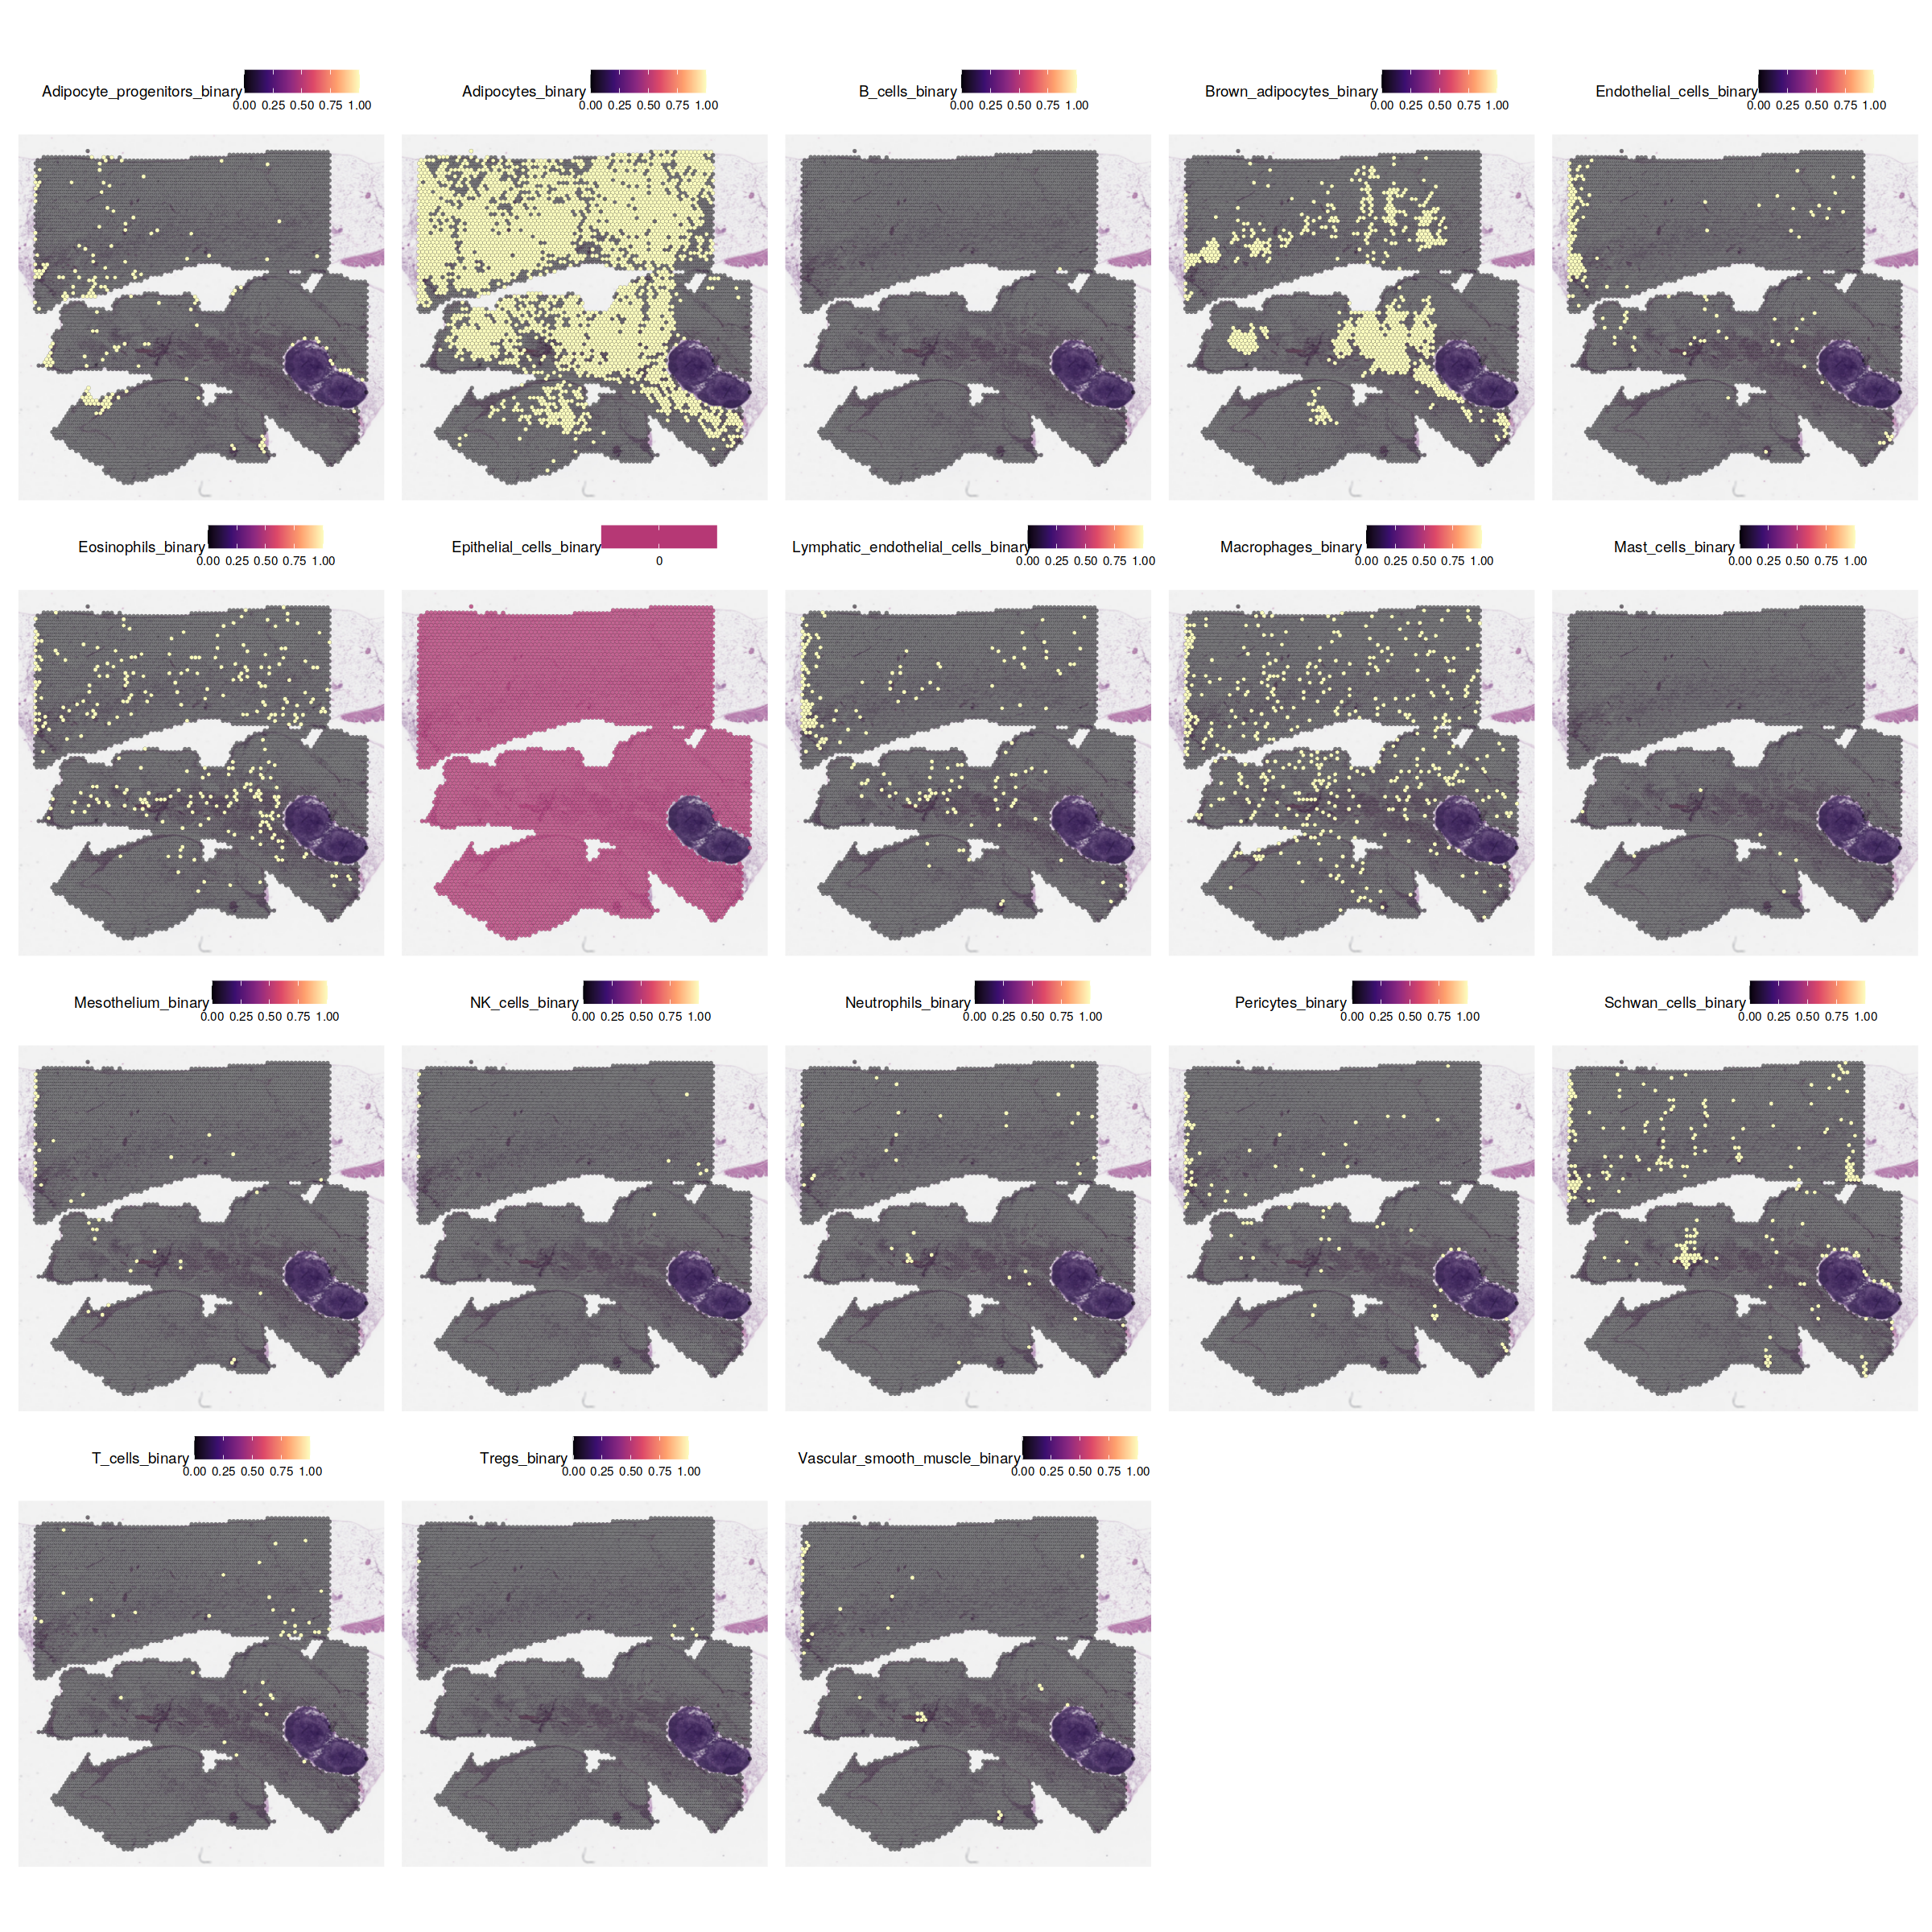

In [23]:
## final block of code to plot
## adjust the object in SpatialPlot to different samples
options(repr.plot.width=20, repr.plot.height=20)
SpatialPlot(object = seurat_B006_3, features = colnames(binaries), alpha = c(0.5, 1), stroke = 0.1, combine = TRUE) & scale_fill_viridis_c(option = 'A', begin = 0, end = 1)